<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>title</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td><a href="https://player.vimeo.com/video/656378731?h=8daa35d1e8">https://player.vimeo.com/video/656378731?h=8daa35d1e8</a></td>
      <td>Groupby Method</td>
    </tr>
    <tr>
      <th>1</th>
      <td><a href="https://player.vimeo.com/video/656378435?h=b3765f3339">https://player.vimeo.com/video/656378435?h=b3765f3339</a></td>
      <td>Bar Chart</td>
    </tr>
    <tr>
      <th>2</th>
      <td><a href="https://player.vimeo.com/video/656378342?h=2f4da7f7b4">https://player.vimeo.com/video/656378342?h=2f4da7f7b4</a></td>
      <td>Column per metre square</td>
    </tr>
    <tr>
      <th>3</th>
      <td><a href="https://player.vimeo.com/video/656377991?h=c7319b0458">https://player.vimeo.com/video/656377991?h=c7319b0458</a></td>
      <td>Bar chart with price per meter square</td>
    </tr>
    <tr>
      <th>4</th>
      <td><a href="https://player.vimeo.com/video/656377758?h=62546c7b86">https://player.vimeo.com/video/656377758?h=62546c7b86</a></td>
      <td>Research question 2</td>
    </tr>
    <tr>
      <th>5</th>
      <td><a href="https://player.vimeo.com/video/656377616?h=8d3b060e71">https://player.vimeo.com/video/656377616?h=8d3b060e71</a></td>
      <td>Research question 2 solution 1</td>
    </tr>
    <tr>
      <th>6</th>
      <td><a href="https://player.vimeo.com/video/656377515?h=d2478d38df">https://player.vimeo.com/video/656377515?h=d2478d38df</a></td>
      <td>Research question 2 solution 2</td>
    </tr>
    <tr>
      <th>7</th>
      <td><a href="https://player.vimeo.com/video/656377395?h=bd93b05ff9">https://player.vimeo.com/video/656377395?h=bd93b05ff9</a></td>
      <td>Research question 2 solution 3</td>
    </tr>
    <tr>
      <th>8</th>
      <td><a href="https://player.vimeo.com/video/656377340?h=664cb44291">https://player.vimeo.com/video/656377340?h=664cb44291</a></td>
      <td>Research question 2 solution 4</td>
    </tr>
    <tr>
      <th>9</th>
      <td><a href="https://player.vimeo.com/video/656376911?h=19666a4c87">https://player.vimeo.com/video/656376911?h=19666a4c87</a></td>
      <td>Research question 2 solution 5</td>
    </tr>
  </tbody>
</table>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("mexico-real-estate-clean.csv")

### Research Question 1
- Which state has the most expensive real estate market?
- Or the question can also be framed in this way - are the prices of the house someway related or correlated to the location(location)


##### Using the groupby function

In [63]:
# We will use the method chaining for this

mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

##### Using bar chart to visualise the chart

- This chart will tell us what are the most expensive and least expensive states in mexico

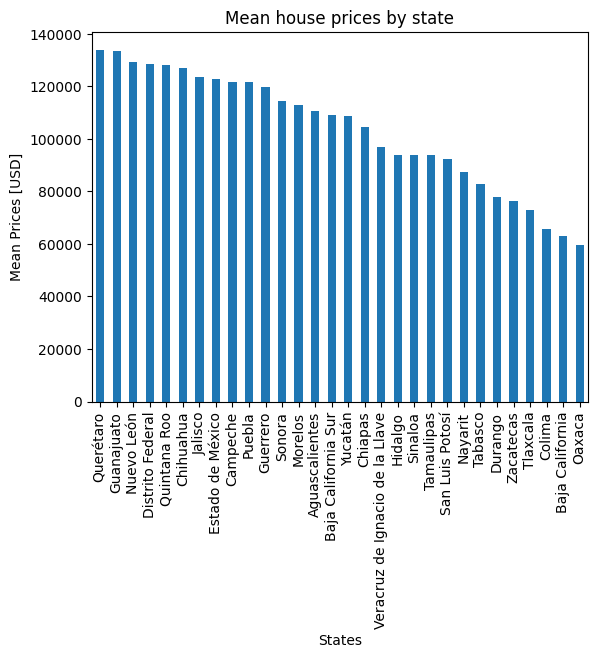

In [64]:
mean_price_by_state.plot(   
    kind="bar",
    xlabel="States",
    ylabel="Mean Prices [USD]",
    title="Mean house prices by state"
);

##### Making calculations based on domain expertise
- Now, prices of the houses can vary a lot based on the area. The above table tells the house price, but we know that these prices can be misleading because we have not taken it's area into account. It is very much possible that in some states, the area availability is too much and houses are big mostly. Also, not necessarily the size of the house can be the only factor, because the surroundings, connectivity and other factors also contribute to the price of the house.. And in some states the houses are small and compact due to low area availability. 
- Therefore, We will use the mean price per square meter, which will give us the exact price by area and then we can find the mean.

The mean(average or on an average) price per meter square (for each state) signifies -
-   The typical cost per square meter in that state.
-   Market rate for housing space in that region
-   Allows direct comparison between states 



In [65]:
df["price_per_m2"] = df["price_usd"]/df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


<Axes: title={'center': 'Mean House Price per m2 by state'}, xlabel='state', ylabel='Mean Price per square meter'>

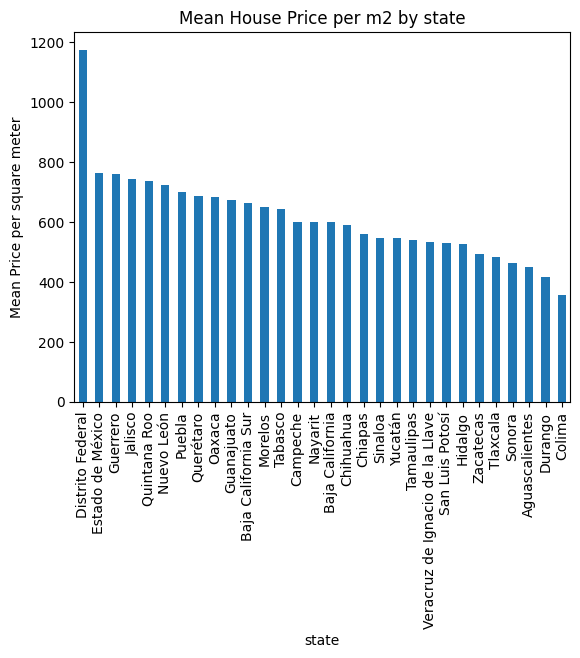

In [66]:
(df
 .groupby("state")
 ["price_per_m2"]
 .mean()
 .sort_values(ascending=False)
 .plot(
     kind="bar",
     xlabel="state",
     ylabel="Mean Price per square meter",
     title="Mean House Price per m2 by state"
 )
 )

Answer : <p style="color:orange"> Capital Mexico City (Distrito Federal) is by far the most expensive market. Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

### Research Question 2
- Is there a relationship between home size and price?
- From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

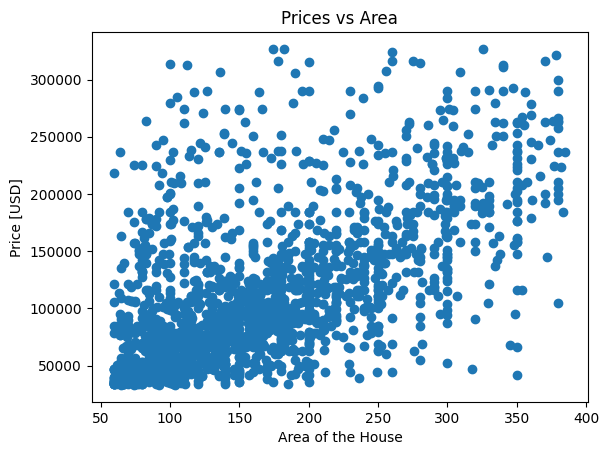

In [67]:
plt.scatter(df["area_m2"],df["price_usd"])
plt.xlabel("Area of the House")
plt.ylabel("Price [USD]")
plt.title("Prices vs Area"); # What we have in Y axis comes first and X axis later

<p style="color:yellow"> Price vs Area correlation </p>
- To establish a relation between two variables, we use a correlation coefficient or pearson correlation coefficient </p>
- The value of coefficient is between -1 and 1 where 1 means strong correlation, -1 means negative strong correlation(inversely proportional) and 0 means no correlation at all.

In [68]:
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation.round(2))

0.59


In [69]:
# Subset to Morelos
df_morelos = df[df["state"]== "Morelos"]
df_morelos

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623
...,...,...,...,...,...,...,...
1708,house,Morelos,18.835637,-99.252857,200,63223.78,316.118900
1713,apartment,Morelos,18.963312,-99.214456,76,43729.78,575.391842
1725,house,Morelos,23.634501,-102.552788,180,63223.78,351.243222
1729,house,Morelos,18.842861,-99.225906,120,105372.96,878.108000


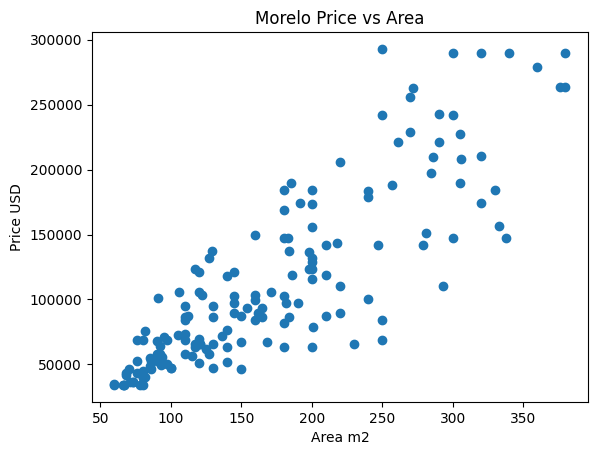

In [70]:
plt.scatter(df_morelos["area_m2"], df_morelos["price_usd"])
plt.xlabel("Area m2")
plt.ylabel("Price USD")
plt.title("Morelo Price vs Area");

In [71]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print(p_correlation)

0.8498077608713712


In [72]:
df_mexico_city = df[df["state"]=="Distrito Federal"]
df_mexico_city.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
14,apartment,Distrito Federal,19.390748,-99.158695,127,131716.20,1037.135433
16,house,Distrito Federal,19.337652,-99.223327,297,264390.77,890.204613
20,apartment,Distrito Federal,19.403334,-99.157755,129,131716.20,1021.055814
21,apartment,Distrito Federal,19.428152,-99.106194,68,67175.26,987.871471
26,apartment,Distrito Federal,19.430141,-99.172536,97,104846.10,1080.887629


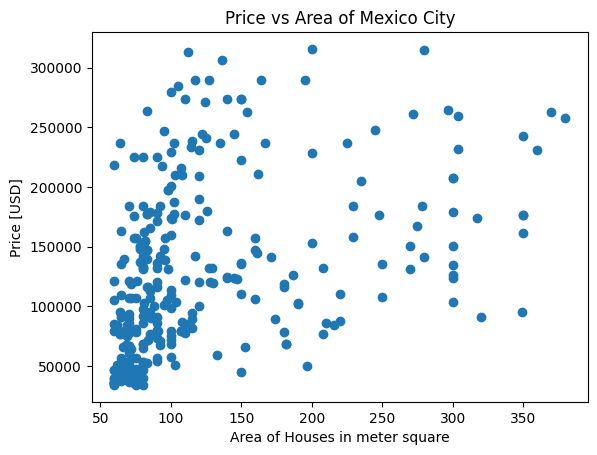

In [73]:
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])
plt.xlabel("Area of Houses in meter square")
plt.ylabel("Price [USD]")
plt.title("Price vs Area of Mexico City")
plt.show()

In [74]:
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)

0.41070392130717864


Answer - <p style="color:yellow"> Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price. How should we interpret this?

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price. In fact, in the next project, we're going to look at another important Latin American city — Buenos Aires, Argentina — and build a model that predicts housing price by taking much more than size into account. </p>